In [15]:
!pip install pandas geopandas matplotlib

In [16]:
import geopandas as gpd
import json
from shapely.geometry import shape

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mlt
%matplotlib inline

In [3]:
df = pd.read_csv("./Milan_Solar_Radiation_GMT_1200_DSR_Clipped.csv")
df.head()

,system:index,GMT_1200_DSR,count,.geo
0,+1000+5039,53242,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
1,+1000+5040,53031,2,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
2,+1000+5041,53010,2,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
3,+1000+5042,53024,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."
4,+1000+5043,53104,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate..."


In [4]:
df.describe()

,GMT_1200_DSR,count
count,2133.000000,2133.000000
mean,52518.020628,1.315987
std,825.395510,0.471030
min,50376.000000,1.000000
25%,51868.000000,1.000000
50%,52567.000000,1.000000
75%,53138.000000,2.000000
max,54569.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system:index  2133 non-null   object
 1   GMT_1200_DSR  2133 non-null   int64 
 2   count         2133 non-null   int64 
 3   .geo          2133 non-null   object
dtypes: int64(2), object(2)
memory usage: 66.8+ KB


In [6]:
df.dtypes

system:index    object
GMT_1200_DSR     int64
count            int64
.geo            object
dtype: object

In [11]:
df.loc[0, '.geo']

'{"geodesic":false,"type":"Polygon","coordinates":[[[8.983152841195215,45.26610716678269],[8.99213599403641,45.26610716678269],[8.99213599403641,45.275090319623885],[8.983152841195215,45.275090319623885],[8.983152841195215,45.26610716678269]]]}'

In [17]:
def parse_geojson(geojson_str):
    geojson = json.loads(geojson_str)
    return shape(geojson)

In [20]:
df['geometry'] = df['.geo'].apply(parse_geojson)
df.head()

,system:index,GMT_1200_DSR,count,.geo,geometry
0,+1000+5039,53242,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.983152841195215 45.26610716678269,..."
1,+1000+5040,53031,2,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.97416968835402 45.275090319623885,..."
2,+1000+5041,53010,2,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.97416968835402 45.28407347246508, ..."
3,+1000+5042,53024,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.983152841195215 45.29305662530628,..."
4,+1000+5043,53104,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate...",POLYGON ((8.983152841195215 45.302039778147474...


In [21]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.head()

,system:index,GMT_1200_DSR,count,.geo,geometry
0,+1000+5039,53242,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.98315 45.26611, 8.99214 45.26611, ..."
1,+1000+5040,53031,2,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.97417 45.27509, 8.99214 45.27509, ..."
2,+1000+5041,53010,2,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.97417 45.28407, 8.99214 45.28407, ..."
3,+1000+5042,53024,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.98315 45.29306, 8.99214 45.29306, ..."
4,+1000+5043,53104,1,"{""geodesic"":false,""type"":""Polygon"",""coordinate...","POLYGON ((8.98315 45.30204, 8.99214 45.30204, ..."


In [22]:
average_dsr = df['GMT_1200_DSR'].mean()
print(f"Average Downward Shortwave Radiation: {average_dsr} W/m²")

Average Downward Shortwave Radiation: 52518.02062822316 W/m²


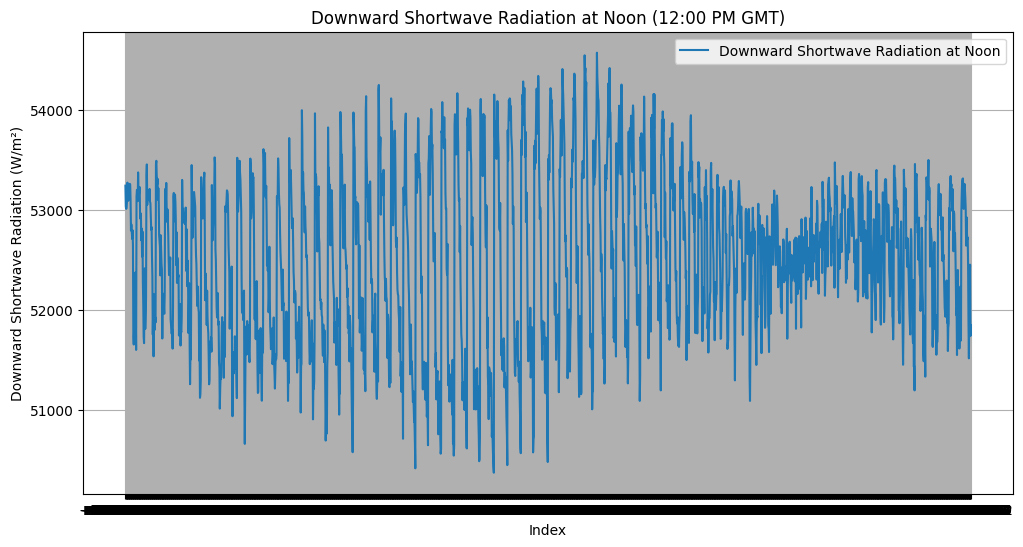

In [25]:
# Visualize the DSR values
plt.figure(figsize=(12, 6))
plt.plot(df['system:index'], df['GMT_1200_DSR'], label='Downward Shortwave Radiation at Noon')
plt.xlabel('Index')
plt.ylabel('Downward Shortwave Radiation (W/m²)')
plt.title('Downward Shortwave Radiation at Noon (12:00 PM GMT)')
plt.legend()
plt.grid(True)
plt.show()

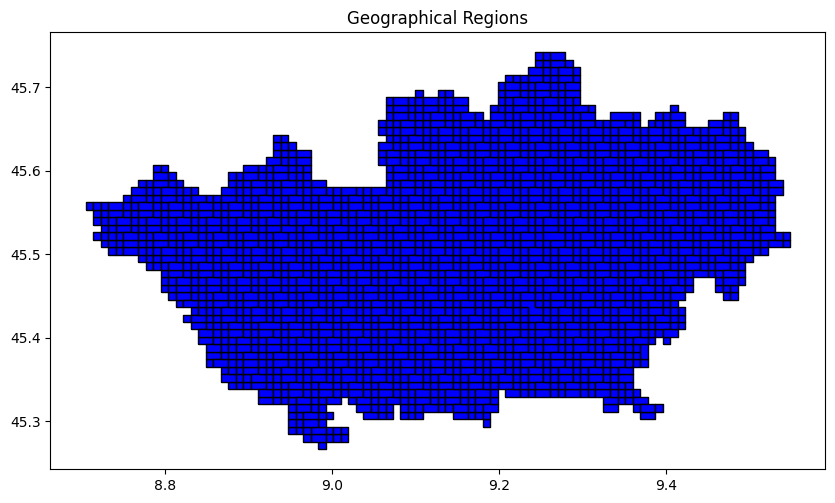

C:\Users\#HOME\AppData\Local\Temp\ipykernel_12976\55393090.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('geographical_regions.shp')


In [24]:
# Visualize the geographical regions
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')
ax.set_title('Geographical Regions')
plt.show()

# save the GeoDataFrame to a new file
gdf.to_file('geographical_regions.shp')

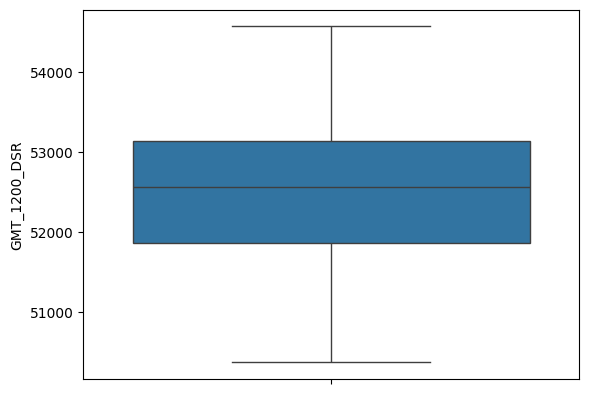

In [27]:
sns.boxplot(data=gdf, y='GMT_1200_DSR')
plt.show()